# Magnetic and Diagenetic Analyses of Richter et al. (2001)
_____

Paper doi: http://www-odp.tamu.edu/publications/175_SR/chap_13/chap_13.htm

Core: ODP Leg 175 Site 1075
Lat/long: 4°47.1´S, 10°4.5´E
Water depth: 2996 m

Data in analysis: Magnetite ppm (from Ms measurements), sedimentation rate, total organic carbon, pore water chemistry.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magnetite = pd.read_excel("data/richter2001.xlsx", sheet_name="Ms")
TOC = pd.read_excel("data/richter2001.xlsx", sheet_name="TOC")
geochem = pd.read_excel("data/richter2001.xlsx", sheet_name="geochem")
ages = pd.read_excel("data/richter2001.xlsx", sheet_name="ages")

# convert Ms to magnetite (ppm)
# divide by 1000 to convert from mA to A
magnetite["Magnetite [ppm]"] = (magnetite["Ms [mAm2/kg]"] * 10**6) / (92 * 1000)

# calculate sed rates from ages
sed_rates = data_fns.sed_rates(ages["Age [Ma]"], ages["Depth [mbsf]"])

In [3]:
# create dataframes of what we are interested in (from dictionaries)
magn_df = pd.DataFrame({"Depth [mbsf]":magnetite["Depth [mbsf]"], "Magnetite [ppm]":magnetite["Magnetite [ppm]"]})

geochem_df = pd.DataFrame({"Depth [mbsf]":geochem["Depth [mbsf]"], "Sulfate [mM]" : geochem["Sulfate (mM)"]})

TOC_df = pd.DataFrame({"Depth [mbsf]":TOC["Depth (mbsf)"], "TOC [wt. %]":TOC["TOC [wt. %]"]})

sed_rates_df = pd.DataFrame({"Depth [mbsf]":ages["Depth [mbsf]"], "Sedimentation Rate [m/Ma]":sed_rates})

# next, append them all together. We can use the result for comparison plots
# after all the appending, sort the whole thing by depth and reset index
comb_df = magn_df.append(geochem_df).append(TOC_df).append(sed_rates_df).sort_values(by="Depth [mbsf]").reset_index(drop=True)

In [4]:
# next task is to interpolate between non-magnetite data points
# passing in columns to interpolate (except for sed rate)
interpolated = data_fns.interpolate(comb_df, ["Sulfate [mM]", "TOC [wt. %]"], sed_rates=True)


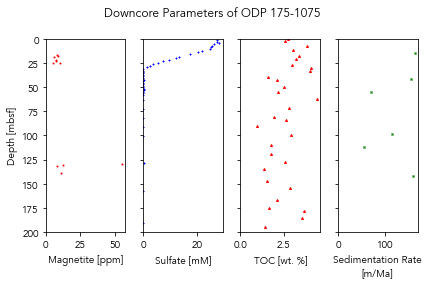

In [6]:
# plot downcore figures
colors = ["r", "b", "r", "g"]
markers = [".", "+", "^", "x"]
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [ppm]", "Sulfate [mM]", "TOC [wt. %]", "Sedimentation Rate [m/Ma]"], comb_df, colors, markers)
dc_fig.suptitle("Downcore Parameters of ODP 175-1075", x=0.5)
dc_axs[3].set_xlabel("Sedimentation Rate\n[m/Ma]")
dc_axs[0].set_xticks([0, 25, 50])
dc_axs[0].set_ylim(200,0)
dc_fig.tight_layout()
dc_fig.savefig("outputs/richter2001/richter2001_dc.pdf")

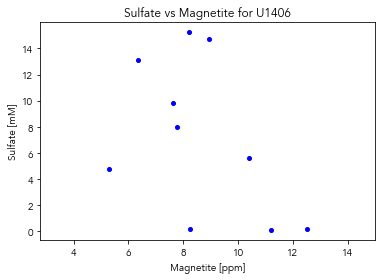

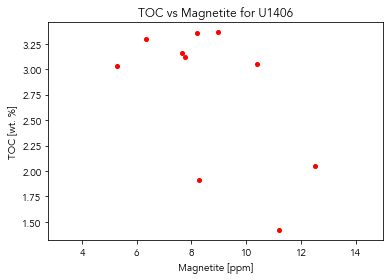

In [29]:
# plot comparison figures
comp_figs, comp_axs = data_fns.plot_comp(["Sulfate [mM]", "TOC [wt. %]"], interpolated, ["b", "r"], [".", "."])

# label and save these if you want
# complicated getting to adjust marker size (just trust me)
comp_axs[0].set(xlabel="Magnetite [ppm]", ylabel="Sulfate [mM]", title="Sulfate vs Magnetite for U1406")
comp_axs[0].set_xlim(xmax=15)
comp_axs[0].get_children()[0].set_markersize(8)
comp_figs[0].savefig("outputs/richter2001/richter2001_sulf-comp.pdf")

comp_axs[1].set(xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite for U1406")
comp_axs[1].set_xlim(xmax=15)
comp_axs[1].get_children()[0].set_markersize(8)
comp_figs[1].savefig("outputs/richter2001/richter2001_TOC-comp.pdf")

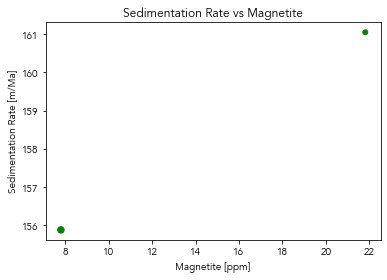

In [32]:
# sed rates comp plot
sed_fig, sed_ax, sed_sc = data_fns.sed_avg_plot(interpolated, 6)
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Ma]", title = "Sedimentation Rate vs Magnetite")
sed_fig.savefig("outputs/richter2001/richter2001_sed-comp.pdf")


In [19]:
# last thing to do is add the dataframes we used to the compilation excel doc
# put the raw and interpolated data in separate files
data_fns.write_output(interpolated, "ODP 175-1075", "data/comp_inter.xlsx")
data_fns.write_output(comb_df, "ODP 175-1075", "data/comp_raw.xlsx")